In [2]:
import os
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import networkx as nx
import community
from matplotlib import pyplot as plt
from bctpy.bct.utils.other import threshold_proportional
import slir

In [3]:
def pearson_corr_with_pval(C):
    corr = np.zeros((len(C), len(C)))
    pval = np.zeros((len(C), len(C)))

    for i in range(len(C)):
        for j in range(len(C)):
            corr[i][j], pval[i][j] = pearsonr(C[i], C[j])
    return corr, pval

In [23]:
C = np.load('../Glasser180ts_run1_npy/sub-03.npy')
# C = np.load('../AAL116ts_run1_npy/sub-01.npy')

In [24]:
corr, pval = pearson_corr_with_pval(C)

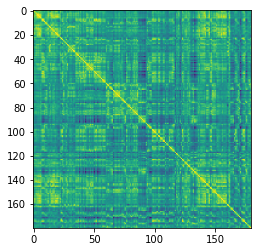

In [25]:
plt.imshow(corr)

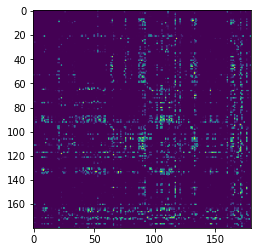

In [26]:
plt.imshow(pval)

In [27]:
results_df = pd.read_csv('../all_results_JASP_output21.csv')
results_df = results_df[:57]

In [8]:
results_df.tail()

,Participant ID,Control/Patient,Completed full study,Gender,DOB,age,CRP,ESR,RheumatoidFactor,DAS score translated,...,preSMA_PPE,preSMA_RPE-PPE,preSMApeak_RPE,preSMApeak_PPE,preSMApk_RPE-PPE,LRr*R,LRp*P,age_demeaned,P_demean,R_demean
52,P75,Control,y,Female,21/12/1957,61.0,0.0,12.0,0.0,2.02 (remission),...,0.7886,-0.1553,1.2750,1.3200,-0.0450,4.695488,2.912513,8.32,-2.322121,-2.448194
53,P76,Control,y,Female,23/02/1972,46.0,0.0,5.0,0.0,1.13 (remission),...,0.6475,-1.0993,0.3530,0.8633,-0.5103,7.734734,4.707469,-6.68,0.608655,2.483694
54,P78,Control,y,Male,20/07/1979,39.0,0.0,4.0,0.0,NaN,...,0.7121,-0.6074,0.1083,1.1270,-1.0187,1.921451,2.832947,-13.68,-4.235522,-8.746788
55,P79,Control,y,Female,20/09/1970,48.0,0.0,7.0,0.0,NaN,...,1.2560,-1.7586,-0.5731,1.3140,-1.8871,4.297163,0.415976,-4.68,-7.110546,-3.363680
56,P80,Control,y,Female,13/05/1961,57.0,5.0,22.0,0.0,NaN,...,1.2500,-0.0300,1.7480,1.4200,0.3280,5.184762,2.385175,4.32,-1.330016,2.383224


In [28]:
num_ROIs = 180
adj_mat = corr
for j in range(num_ROIs):
    for j in range(num_ROIs):
        adj_mat[j][j] = 0

thresholded_adj_mat_pval_based = np.zeros_like(adj_mat)
binarized_adj_mat_pval_based = np.zeros_like(adj_mat)
thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0

for j in range(num_ROIs):
    for k in range(num_ROIs):
        if pval[j][k]:
            thresholded_adj_mat_pval_based[j][k] = corr[j][k]
            binarized_adj_mat_pval_based[j][k] = 1

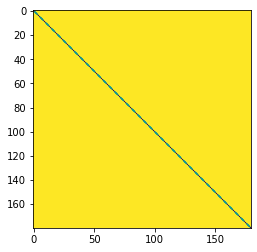

In [29]:
plt.imshow(binarized_adj_mat_pval_based)

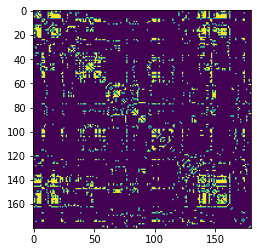

In [30]:
plt.imshow(binarized_adj_mat_top10percent)

# Nodal metrics

In [ ]:
run = 'run-1' #'rest'
if run=='run-1':
    ts_dir = '../Glasser180ts_run1_npy/'
elif run=='run-2':
    ts_dir = '../Glasser180ts_run2_npy/'
elif run=='run-3':
    ts_dir = '../Glasser180ts_run3_npy/'
elif run=='run-4':
    ts_dir = '../Glasser180ts_run4_npy/'
elif run=='rest':
    ts_dir = '../Glasser180ts_rest_npy/'

In [13]:
num_participants = 57
num_ROIs = 180

# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5
network_metrics = np.zeros((num_participants, num_ROIs, num_metrics))
print(network_metrics.shape)

lst = os.listdir(ts_dir)
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join(ts_dir,npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
                
    graph = nx.from_numpy_matrix(binarized_adj_mat_top10percent)

    for node_index in range(num_ROIs):
        network_metrics[subj,node_index, :] = np.array([nx.degree_centrality(graph)[node_index], 
                                               nx.eigenvector_centrality(graph)[node_index], 
                                               nx.betweenness_centrality(graph)[node_index],
                                               nx.closeness_centrality(graph)[node_index],
                                               nx.load_centrality(graph)[node_index]])

    subj+=1

with open('network_metrics_'+run+'.npy', 'wb') as f:
    np.save(f, network_metrics)

(57, 180, 5)
sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [8]:
network_metrics_loaded = np.load('network_metrics_'+run+'.npy')
network_metrics_loaded.shape

(57, 180, 5)

In [9]:
# P_demean = np.array(results_df['P_demean'])
# R_demean = np.array(results_df['R_demean'])

In [11]:
# num_participants = 57
# num_ROIs = 180

# # degree, eigen-vector, betweenness, closeness, load
# num_metrics = 5

# for metric in range(num_metrics):
#     print(metric)
#     for ROI in range(num_ROIs):
#         corr, pval = pearsonr(network_metrics_loaded[:, ROI,metric], P_demean)
#         if pval<0.05:
#             print(corr, pval, ROI+1)

0
0.26223672197959474 0.0487676450778343 49
0.30312359219342344 0.02190286575104679 89
0.31795905048477546 0.015940789248069038 137
1
0.2646373080351025 0.046665252725021554 89
0.3405703463031471 0.009534090715375955 137
0.2697754411969495 0.042414148150005264 154
0.26239755921903973 0.04862441122084857 157
2
-0.2886021197326259 0.029466869215590906 16
-0.27527947800210745 0.038219016080457066 37
0.27510976716538194 0.03834303870671659 72
0.30484192716315084 0.021127686220342296 89
0.28327906560265276 0.032738221106721505 154
3
0.26196015172417564 0.04901475040380586 13
0.27356812530969987 0.0394849599377063 66
0.27873689297999643 0.035763706271629454 87
0.31953527910728624 0.015397875752605449 154
4
-0.28300687380821044 0.03291331624189955 16
-0.2811880660089454 0.03410343137090716 37
0.26640727409411985 0.04516313226484949 72
0.28787983553110036 0.029894043342196815 89
0.2721688332030978 0.04054560352216014 154


In [38]:
patients_P_demean = np.array(patients_df['P_demean'])
patients_network_metrics = network_metrics_loaded[:29]

In [40]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_P_demean)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
0.5570821313850807 0.0016948530359983983 39
0.5044615008934499 0.005261291740073081 42
0.5352582646385743 0.002771567182267921 49
0.5045354267425369 0.00525356747117879 51
-0.5346488490277589 0.0028085850763942734 95
1
0.537500190328953 0.0026389756759800332 39
-0.5309187772273433 0.0030445649513353994 95
-0.4783171346099293 0.00867523104238666 144
2
3
4


## fatigue

In [17]:
patients_df = results_df[:29]

In [30]:
patients_network_metrics = network_metrics_loaded[:29]

In [24]:
patients_avg_fatigue = np.array(patients_df['Diary avg fatigue'])
patients_facit = np.array(patients_df['Facit'])

In [32]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_avg_fatigue)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
-0.4732064911863909 0.00952436499372924 20
0.5164195681281045 0.00413085243591298 32
0.5106060120945854 0.00465134288316553 34
-0.5004998450456412 0.0056896215301968185 138
-0.5525882641009263 0.0018805943198775463 158
0.48025189016632286 0.008370867123678963 167
1
-0.471955931191728 0.009742460597774442 163
2
-0.47852813326060173 0.00864159164621164 18
-0.47566295270325043 0.009107894458033547 49
-0.4919417557632555 0.006716960249125113 113
0.4783336199889274 0.008672598821457008 117
-0.49060303817163164 0.006891071109301075 130
0.5371460795979716 0.002659547756146966 167
3
0.4890813272804182 0.007093607258743881 32
0.49773283476354135 0.006006064535713854 34
-0.47192560047739585 0.009747801891292138 159
4
-0.4844120052217223 0.007746804316884992 18
-0.48946793880448175 0.007041678883699053 113
-0.49022914075746293 0.006940376575520195 130
0.5395782675626615 0.002520990234721296 167


In [33]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_facit)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
-0.47731944990853065 0.008835789049036863 95
0.48597100187859477 0.00752328885541365 99
0.5212627971784325 0.00373607231460833 159
1
-0.492757088894436 0.006612756867612306 79
2
-0.54613716126048 0.002177917959083243 61
3
4
-0.544219142247993 0.0022737969949737716 61


## immunological markers

In [34]:
patients_esr = np.array(patients_df['ESR'])
patients_il6 = np.array(patients_df['IL-6'])

In [35]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_esr)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
1
2
0.6132287154350297 0.00040454317162871335 47
0.6456924977511768 0.00015508193566494936 101
0.4931219961701001 0.006566565671441989 146
3
4
0.5903525162806115 0.000748424799642351 47
0.637049587343086 0.00020231844861267045 101
0.4737903039468624 0.009423962757267553 146


In [36]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_il6)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
0.5079980460025203 0.00490242344620685 67
1
0.6288356003544014 0.0002585782812596407 67
2
0.4931636567456589 0.006561309569764952 58
0.5639758981820817 0.0014408243339869785 60
0.48327177582497277 0.007913808851141207 125
3
4
0.5493510759063295 0.002025077825364474 60
0.4749921557849895 0.0092200712614059 125


In [1]:
patients_immun = np.array(patients_df['TNFα'])
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_immun)
        if pval<0.01:
            print(corr, pval, ROI+1)

NameError: name 'np' is not defined

# Global metrics

In [35]:
num_participants = 57
num_ROIs = 180

# modularity, small-world sigma, small-world omega, 
num_metrics = 3
global_network_metrics = np.zeros((num_participants, num_metrics))
print(network_metrics.shape)

lst = os.listdir('../Glasser180ts_run1_npy/')
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../Glasser180ts_run1_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
                
    graph = nx.from_numpy_matrix(binarized_adj_mat_top10percent)

    # Find modularity
    part = community.best_partition(graph)
    mod = community.modularity(part,graph)
#     global_network_metrics[subj, :] = np.array([mod, nx.sigma(graph), nx.omega(graph)])
    global_network_metrics[subj, :] = np.array([mod])


    subj+=1

with open('global_network_metrics.npy', 'wb') as f:
    np.save(f, global_network_metrics)

(57, 180, 5)
sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [41]:
xi_lapse = np.array(results_df['xi'])

In [43]:
corr, pval = pearsonr(global_network_metrics[:, 0], xi_lapse)
corr, pval

(-0.02899646224535794, 0.8304586210640141)

# Multilinear regression

In [48]:
def upper_tri_masking(A):
    m = A.shape[0]
    r = np.arange(m)
    mask = r[:,None] < r
    return A[mask]

In [53]:
num_participants = 57
num_ROIs = 180


X = np.zeros((num_participants, 16110))
Y = P_demean

lst = os.listdir('../Glasser180ts_run1_npy/')
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../Glasser180ts_run1_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
    X[subj] = upper_tri_masking(adj_mat)    

    subj+=1

sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [104]:
indices = np.arange(num_participants)
np.random.shuffle(indices)
X_shuffled = X[indices]
Y_shuffled = Y[indices]
model = slir.SparseLinearRegression(n_iter=200, verbose=True)

x_train = X_shuffled[:45]
y_train = Y_shuffled[:45]
x_test = X_shuffled[45:]
y_test = Y_shuffled[45:]

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

SLiR (Sparse Linear Regression)
InputDim:16110/OutputLabels:1/TrainNum:45
Iter:10, DimNum:10564, Error:0.000285
Iter:20, DimNum:2130, Error:0.000129
Iter:30, DimNum:382, Error:0.000077
Iter:40, DimNum:138, Error:0.000048
Iter:50, DimNum:74, Error:0.000040
*
Iter:60, DimNum:60, Error:0.000039
*
*
Iter:70, DimNum:48, Error:0.000005
Iter:80, DimNum:42, Error:0.000020
Iter:90, DimNum:41, Error:0.000013
Iter:100, DimNum:41, Error:0.000010
Iter:110, DimNum:41, Error:0.000008
Iter:120, DimNum:41, Error:0.000008
Iter:130, DimNum:41, Error:0.000007
Iter:140, DimNum:41, Error:0.000007
Iter:150, DimNum:41, Error:0.000007
Iter:160, DimNum:41, Error:0.000007
Iter:170, DimNum:41, Error:0.000006
Iter:180, DimNum:41, Error:0.000005
Iter:190, DimNum:41, Error:0.000004
Iter:200, DimNum:41, Error:0.000004


In [105]:
y_pred

array([-4.73595648, -3.24824683, -4.92867827,  0.5295537 , -2.68022195,
        2.17292784, -3.24290022, -2.43836374,  2.13014625, -3.51806692,
       -3.25818848,  2.49758329])

In [106]:
y_test

array([ 2.46608252, -6.2977876 , -0.3573006 ,  4.0166552 ,  5.73740175,
        0.60865463, -6.55232368,  4.86839052,  0.2291673 ,  4.21649654,
       -1.80388124,  6.73947668])

In [107]:
print("Correlation: %.4f" % np.corrcoef(y_pred, y_test)[0, 1])
print("MSE: %.4f" % np.mean((y_pred - y_test) ** 2))

Correlation: 0.3019
MSE: 26.2847


In [108]:
model.coef_[model.coef_>0]

array([1.26227659, 0.8227204 , 1.45826332, 1.48450463, 1.90377789,
       0.45099504, 1.44349439, 1.42971098, 6.1342129 , 0.23616095,
       1.53447003, 0.09167925, 0.62505626, 2.63564451, 3.37017969,
       4.79937553, 0.5726302 , 3.96991018, 1.77952641, 2.76962909,
       0.57410125])